In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


Dataset Path & Class Names

In [2]:
data_dir = r"C:\Down\Eye_Disease\Dataset"   
classes = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
print("Classes:", classes)


Classes: ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


Number of Images per Class

In [3]:
image_counts = {}

for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    image_counts[cls] = len(os.listdir(cls_path))

print("Image count per class:", image_counts)


Image count per class: {'cataract': 1038, 'diabetic_retinopathy': 1098, 'glaucoma': 1007, 'normal': 1074}


Bar Plot

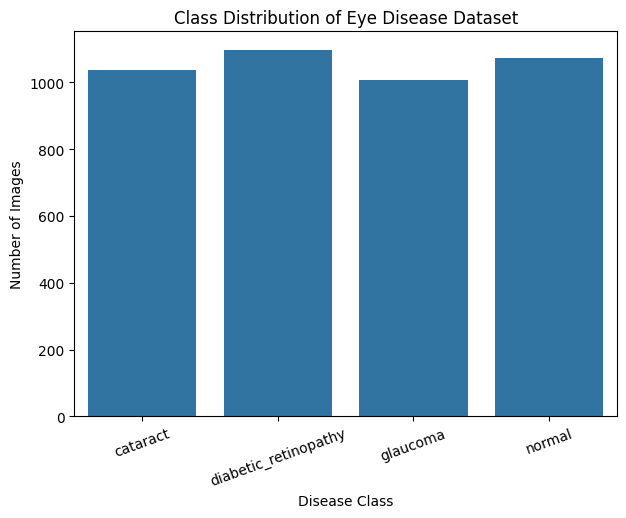

In [4]:
plt.figure(figsize=(7,5))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()))
plt.title("Class Distribution of Eye Disease Dataset")
plt.xlabel("Disease Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=20)
plt.show()


Show Sample Image from Each Class

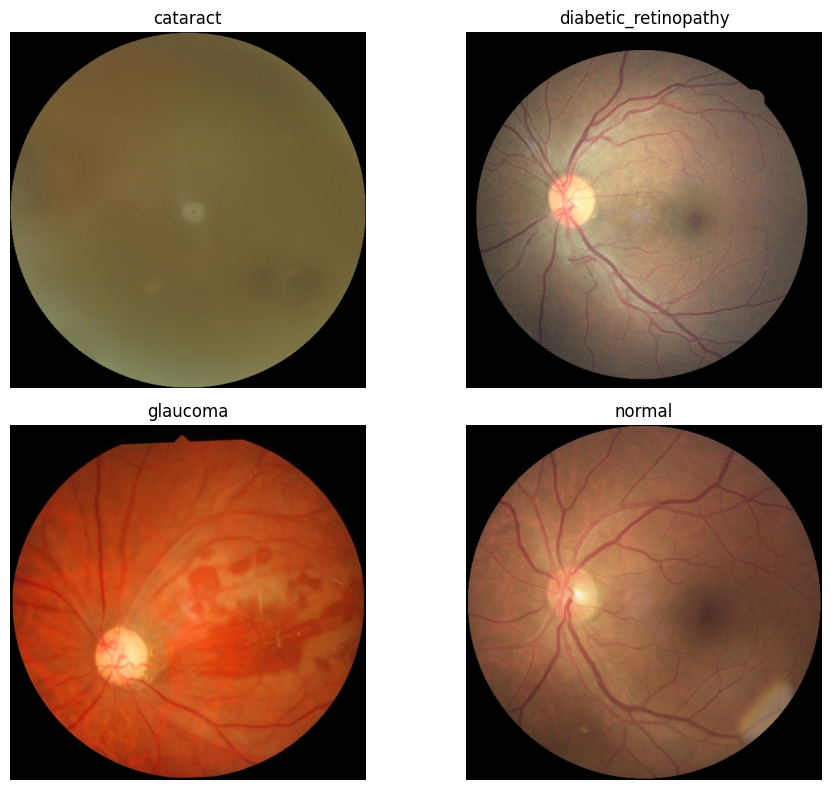

In [5]:
plt.figure(figsize=(10,8))

for i, cls in enumerate(classes):
    img_name = os.listdir(os.path.join(data_dir, cls))[0]
    img_path = os.path.join(data_dir, cls, img_name)

    img = Image.open(img_path)

    plt.subplot(2,2,i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.tight_layout()
plt.show()


Image Size Analysis

In [6]:
widths, heights = [], []

for cls in classes:
    cls_path = os.path.join(data_dir, cls)

    for img_name in os.listdir(cls_path)[:50]:   # sample images
        img = Image.open(os.path.join(cls_path, img_name))
        w, h = img.size
        widths.append(w)
        heights.append(h)


Size Distribution Plot

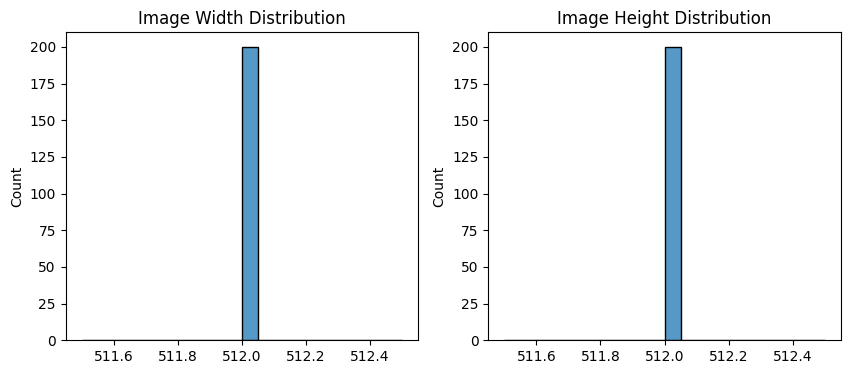

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(widths, bins=20)
plt.title("Image Width Distribution")

plt.subplot(1,2,2)
sns.histplot(heights, bins=20)
plt.title("Image Height Distribution")


plt.show()


Pixel Intensity Distribution

In [8]:
pixels = []

for cls in classes:
    cls_path = os.path.join(data_dir, cls)

    for img_name in os.listdir(cls_path)[:20]:
        img = Image.open(os.path.join(cls_path, img_name)).convert("L")
        pixels.extend(np.array(img).flatten())


Histogram

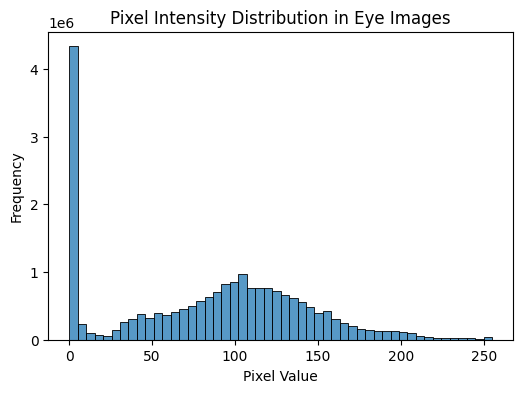

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(pixels, bins=50)
plt.title("Pixel Intensity Distribution in Eye Images")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


Class Balance Percentage

In [10]:
total_images = sum(image_counts.values())

for cls, count in image_counts.items():
    print(f"{cls}: {count} images ({count/total_images*100:.2f}%)")


cataract: 1038 images (24.61%)
diabetic_retinopathy: 1098 images (26.04%)
glaucoma: 1007 images (23.88%)
normal: 1074 images (25.47%)
